In [3]:
import ast              # Módulo de Árboles de Sintaxis Abstracta
import pandas as pd     # Librería para manipular datasets
import pyarrow as pa    # Útil para operaciones de lectura y escritura de datos
import pyarrow.parquet as pq   # Útil para leer y escribir datos en formato Parquet de manera eficiente
import os               # creación de directorios y comprobación de existencia
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [4]:

# Ruta al archivo business.pkl
file_path = 'business.pkl'

# Cargar el archivo en un DataFrame de Pandas
df_business = pd.read_pickle(file_path)
df_business
# Mostrar las primeras filas del DataFrame
#print(df_business.head())


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,IN,T6J 5H2,53.468419,-113.492054,3.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,37204,36.115118,-86.766925,4.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,AB,46250,39.908707,-86.065088,3.5,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,62025,38.782351,-89.950558,4.0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Eliminar columnas duplicadas del DataFrame
df_business = df_business.loc[:, ~df_business.columns.duplicated()]

# Verificar la información del DataFrame después de eliminar las columnas duplicadas
df_business.info()


<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


In [6]:
data_type_process = {
    "columna": df_business.columns.tolist(), 
    "tipo": [df_business[columna].apply(type).unique() for columna in df_business.columns]
}

#Se visualizara el nombre de la columna y su tipo de dato
data_type = pd.DataFrame(data_type_process)
data_type

,columna,tipo
0,business_id,[<class 'str'>]
1,name,[<class 'str'>]
2,address,[<class 'str'>]
3,city,[<class 'str'>]
4,state,"[<class 'float'>, <class 'str'>]"
5,postal_code,[<class 'str'>]
6,latitude,[<class 'float'>]
7,longitude,[<class 'float'>]
8,stars,[<class 'float'>]
9,review_count,[<class 'int'>]


In [7]:
nulos= df_business.isnull().sum()
nulos

business_id         0
name                0
address             0
city                0
state               3
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [8]:
# se eliminan valores nulos por columnas
df_business = df_business.dropna(subset=['attributes'])
df_business = df_business.dropna(subset=['categories'])
df_business = df_business.dropna(subset=['hours'])
df_business = df_business.dropna(subset=['state'])

In [9]:
nulos= df_business.isnull().sum()
nulos

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64

In [10]:
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,PA,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,37207,36.208102,-86.76817,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150340,hn9Toz3s-Ei3uZPt7esExA,West Side Kebab House,2470 Guardian Road NW,Edmonton,NJ,T5T 1K8,53.509649,-113.675999,4.5,18,0,"{'Ambience': '{'touristy': False, 'hipster': F...","Middle Eastern, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,IN,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [12]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

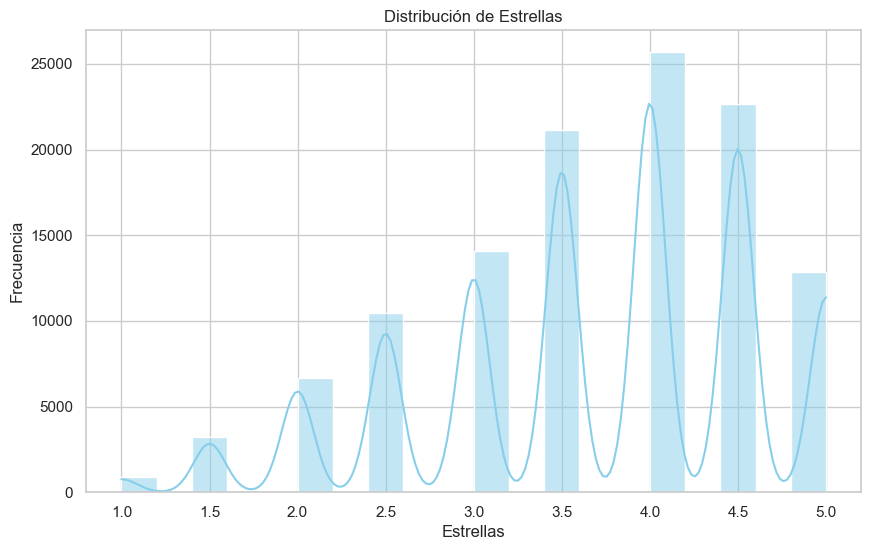

In [13]:
# Gráfico 1: Distribución de estrellas
plt.figure(figsize=(10, 6))
sns.histplot(df_business['stars'], bins=20, color='skyblue', kde=True)
plt.title('Distribución de Estrellas')
plt.xlabel('Estrellas')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\Nazareno\AppData\Local\Temp\ipykernel_10320\3389436427.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_business, x='city', order=df_business['city'].value_counts().index[:10], palette='pastel')


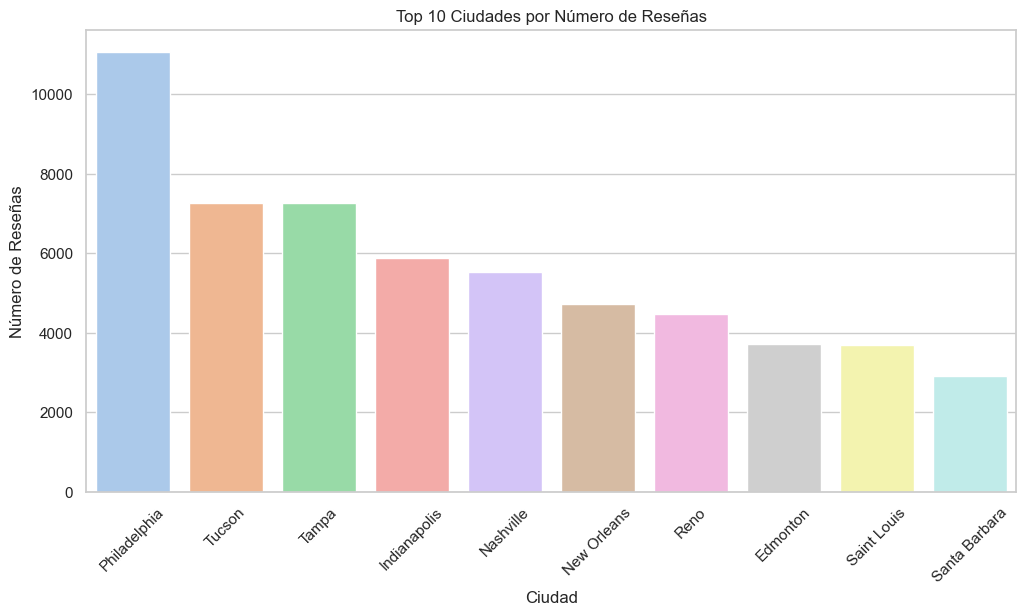

In [14]:
# Gráfico 2: Número de reseñas por ciudad
plt.figure(figsize=(12, 6))
sns.countplot(data=df_business, x='city', order=df_business['city'].value_counts().index[:10], palette='pastel')
plt.title('Top 10 Ciudades por Número de Reseñas')
plt.xlabel('Ciudad')
plt.ylabel('Número de Reseñas')
plt.xticks(rotation=45)
plt.show()

C:\Users\Nazareno\AppData\Local\Temp\ipykernel_10320\2521134645.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_business, x='is_open', y='stars', palette='Set2')


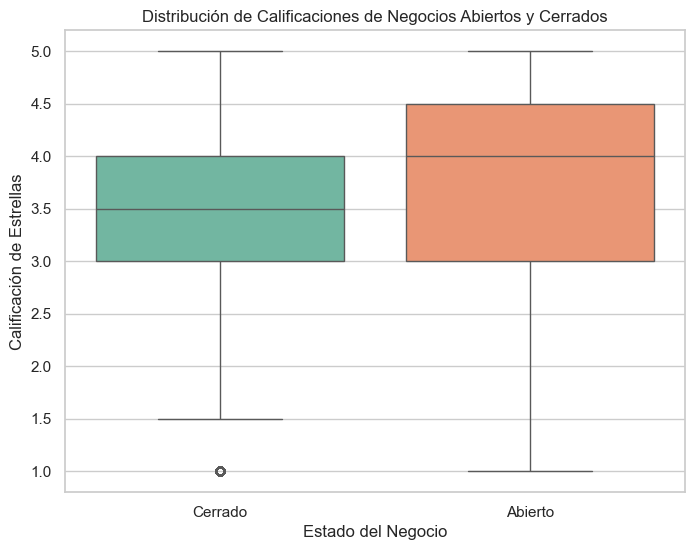

In [16]:
# Gráfico 3: Distribución de las calificaciones de negocios abiertos y cerrados
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_business, x='is_open', y='stars', palette='Set2')
plt.title('Distribución de Calificaciones de Negocios Abiertos y Cerrados')
plt.xlabel('Estado del Negocio')
plt.ylabel('Calificación de Estrellas')
plt.xticks(ticks=[0, 1], labels=['Cerrado', 'Abierto'])
plt.show()

C:\Users\Nazareno\AppData\Local\Temp\ipykernel_10320\1139445376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_business, x='state', y='stars', palette='muted')


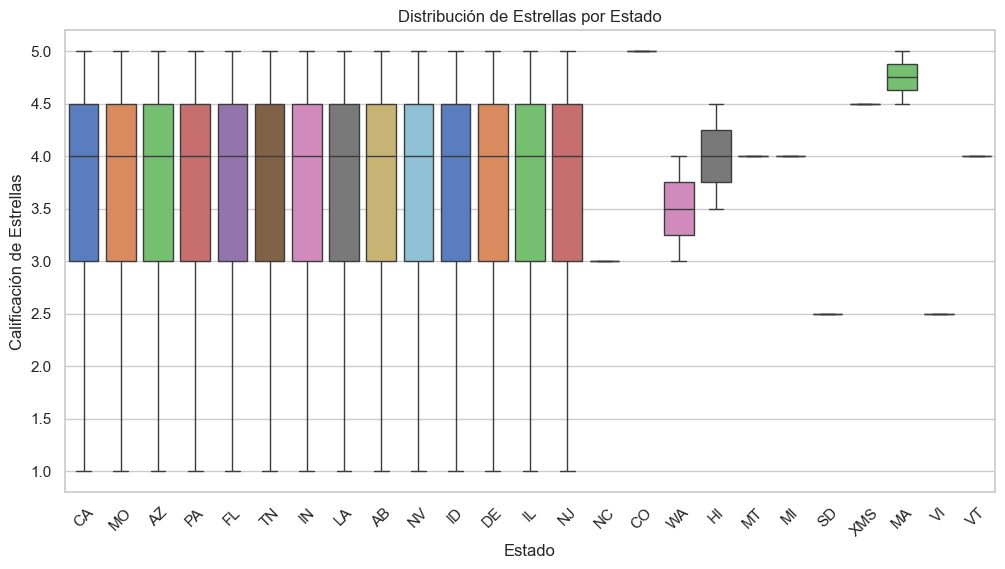

In [17]:
# Gráfico 5: Distribución de estrellas por estado
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_business, x='state', y='stars', palette='muted')
plt.title('Distribución de Estrellas por Estado')
plt.xlabel('Estado')
plt.ylabel('Calificación de Estrellas')
plt.xticks(rotation=45)
plt.show()

C:\Users\Nazareno\AppData\Local\Temp\ipykernel_10320\1215739015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_business, x='is_open', palette='pastel')


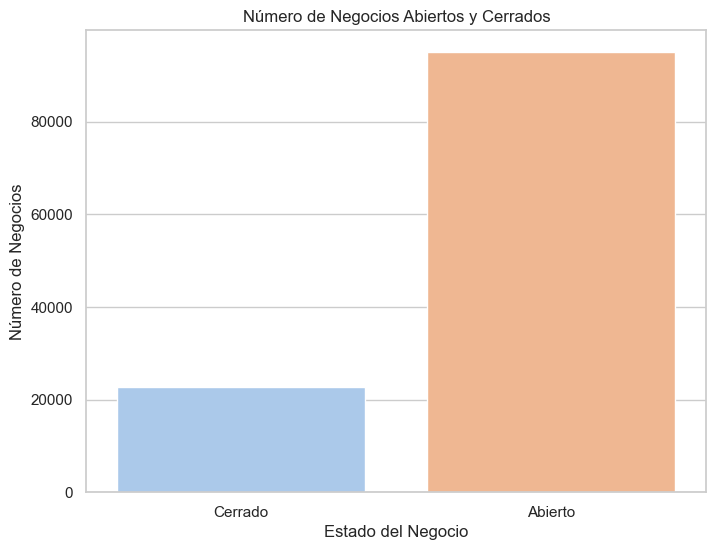

In [20]:
# Gráfico 7: Número de negocios abiertos y cerrados
plt.figure(figsize=(8, 6))
sns.countplot(data=df_business, x='is_open', palette='pastel')
plt.title('Número de Negocios Abiertos y Cerrados')
plt.xlabel('Estado del Negocio')
plt.ylabel('Número de Negocios')
plt.xticks(ticks=[0, 1], labels=['Cerrado', 'Abierto'])
plt.show()

C:\Users\Nazareno\AppData\Local\Temp\ipykernel_10320\1082333410.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_business, x='state', palette='pastel')


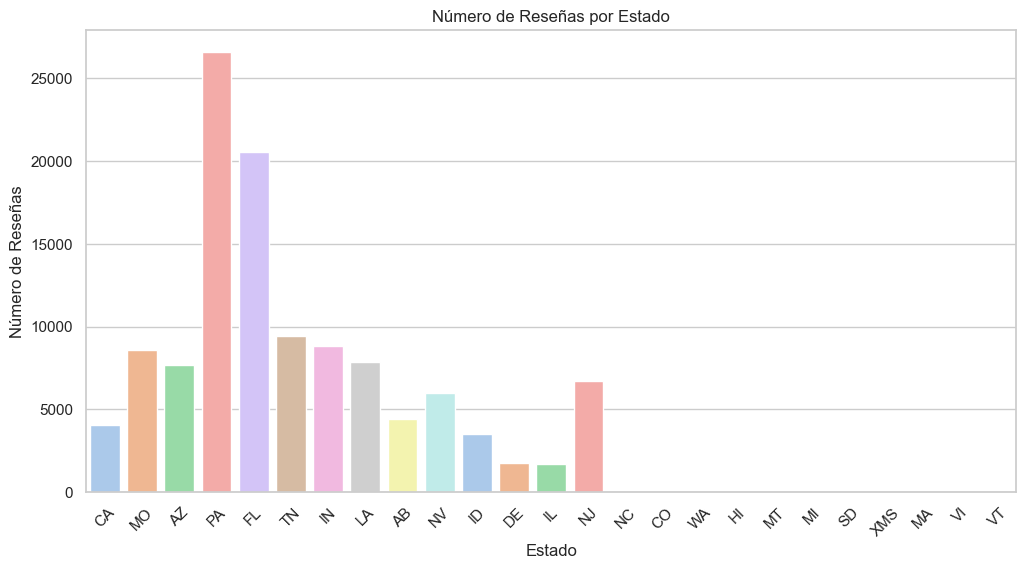

In [24]:
# Gráfico 9: Número de reseñas por estado
plt.figure(figsize=(12, 6))
sns.countplot(data=df_business, x='state', palette='pastel')
plt.title('Número de Reseñas por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Reseñas')
plt.xticks(rotation=45)
plt.show()

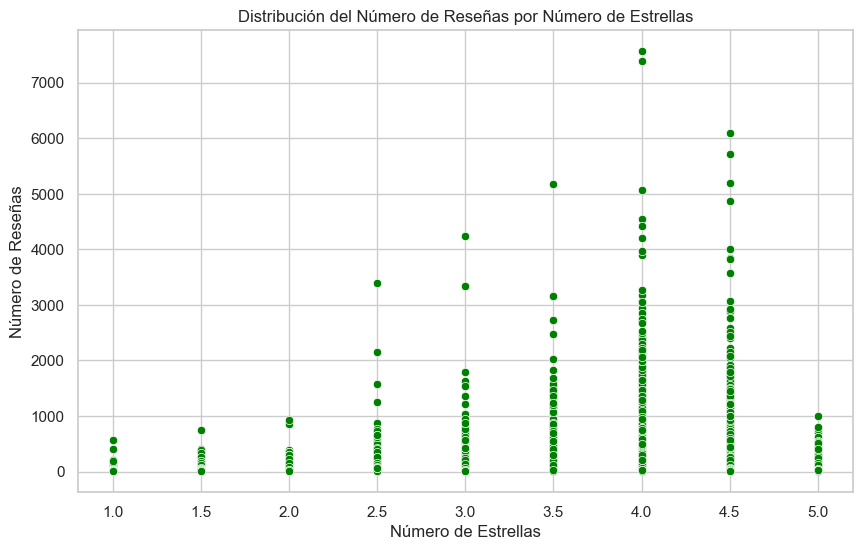

In [25]:
# Gráfico 10: Distribución del número de reseñas por número de estrellas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_business, x='stars', y='review_count', color='green')
plt.title('Distribución del Número de Reseñas por Número de Estrellas')
plt.xlabel('Número de Estrellas')
plt.ylabel('Número de Reseñas')
plt.show()

In [ ]:
dd